In [11]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random


In [44]:
learning_rate = 0.005
training_epochs = 1000
display_step = 50

In [45]:
# Training Data
train_X = numpy.asarray([1,2,4,3,5])
train_Y = numpy.asarray([1,3,3,2,5])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [46]:

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [47]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


In [48]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.246302292 W= 0.87786 b= 0.144511
Epoch: 0100 cost= 0.245549560 W= 0.869166 b= 0.153372
Optimization Finished!
Training cost= 0.24555 W= 0.869166 b= 0.153372 



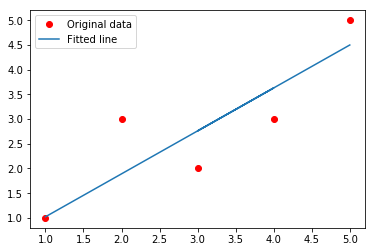

Epoch: 0050 cost= 0.246302292 W= 0.87786 b= 0.144511
Epoch: 0100 cost= 0.245549560 W= 0.869166 b= 0.153372
Optimization Finished!
Training cost= 0.24555 W= 0.869166 b= 0.153372 



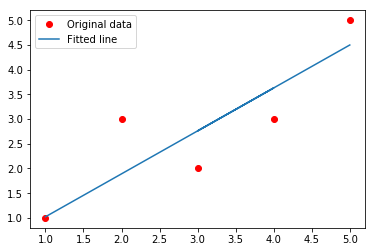

In [51]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
   # print(sess.run(cost))
    # Fit all training data
    for epoch in range(100):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    #############################################################################
    optimizer = tf.train.GradientDescentOptimizer(0.005).minimize(cost)
    # Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(100):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()